# Marketing Campaigns 
### Measuring effectiveness of marketing campaigns across multiple channels

--


## DESCRIPTION

We'll practice translating common business questions into measurable outcomes, including 


- How did this campaign perform?
- Which channel is referring the most subscribers?
- Why is a particular channel underperforming?


## DATA

The data is syntehtic marketing dataset based on the data of an online subscription business

## PACKAGE IMPORTS

In [1]:
# warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## DATA ACQUISATION 

In [2]:
def read_data(name, index_col = None):
    """
    A function to import dataset and print its details
    """
    data = pd.read_csv( name , index_col = index_col)
    
    print ("Number of Rows in clients : " ,data.shape[0])
    print ("Number of Columns in clients dataset : " , data.shape[1])

    return data

In [3]:
customers_marketing = read_data("marketing_new.csv", index_col = 0) # read clients

customers_marketing.head()

Number of Rows in clients :  10037
Number of Columns in clients dataset :  15


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes


## EXAMINING THE DATA
##### CHECK COLUMN DATA TYPES AND NON-MISSING VALUES

In [4]:
print(customers_marketing.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              10037 non-null  object 
 1   date_served          10021 non-null  object 
 2   marketing_channel    10022 non-null  object 
 3   variant              10037 non-null  object 
 4   converted            10037 non-null  bool   
 5   language_displayed   10037 non-null  object 
 6   language_preferred   10037 non-null  object 
 7   age_group            10037 non-null  object 
 8   date_subscribed      1856 non-null   object 
 9   date_canceled        577 non-null    object 
 10  subscribing_channel  1856 non-null   object 
 11  is_retained          10037 non-null  bool   
 12  DoW                  1856 non-null   float64
 13  channel_code         1856 non-null   float64
 14  is_correct_lang      10037 non-null  object 
dtypes: bool(2), float64(2), object(11)
m

### UPDATING THE DATA TYPE OF A COLUMN

In [5]:
# Check the data type of is_retained
print(customers_marketing['is_retained'].dtype)

bool


In [6]:
# Convert is_retained to a boolean
customers_marketing['is_retained'] = customers_marketing['is_retained'].astype('bool')

# Check the data type of is_retained, again
print(customers_marketing['is_retained'].dtype)

bool


## FEATURE ENGINEERING

Adding new columns that derive information from existing data or based on domain knowledge is known as Feature Engineering. Even in relatively simple datasets, there are always new characteristics you could pull out to create a more in-depth analysis. One of the most critical skills a data scientist needs to learn is how to identify opportunities for feature engineering.

Here we will add two columns to marketing:

- day_of_week: represents the day of the week as an integer (we added a new column, day that represents the day of the week and defined a dictionary that maps the day of the week to each numerical value from 0 to 6 for this purpose.)
- is_correct_lang: conveys whether the ad was shown to the user in their preferred language
- Add a new column, channel_code, which maps the values in the subscribing_channel column to a numeric scale using the channel_dict dictionary.

In [7]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2,  "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
customers_marketing['channel_code'] = customers_marketing['subscribing_channel'].map(channel_dict)

In [8]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
customers_marketing['channel_code'] = customers_marketing['subscribing_channel'].map(channel_dict)

# Add the new column is_correct_lang
customers_marketing['is_correct_lang'] = np.where(customers_marketing['language_preferred'] == customers_marketing['language_displayed'], 'Yes', 'No')

### DATE COLUMNS

Currently, the date columns in the marketing DataFrame are being incorrectly read as objects. We need to convert these columns to date columns to be able to use Python and pandas' robust date manipulation and formatting capabilities.


In [9]:
# Import marketing.csv with date columns
customers_marketing = pd.read_csv('marketing.csv', 
                        parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

# Add a DoW column
customers_marketing['DoW'] = customers_marketing['date_subscribed'].dt.dayofweek

### DAILY MARKETING REACH BY CHANNEL

We going to have a look many users are seeing the marketing assets each day. This is crucial to understand how effective our marketing efforts have been over the past month.

In [10]:
# Group by date_served and count number of unique user_id's
daily_users = customers_marketing.groupby(['date_served'])['user_id'].nunique()
daily_users_df = daily_users.reset_index()
daily_users_df.rename(columns = {'user_id':'user_number'}, inplace = True)
# Print head of daily_users
print(daily_users_df.head())

  date_served  user_number
0  2018-01-01          362
1  2018-01-02          374
2  2018-01-03          348
3  2018-01-04          323
4  2018-01-05          319


# DAILY MARKETING REACH
The daily_subscribers DataFrame, which contained the number of users who subscribed each day.

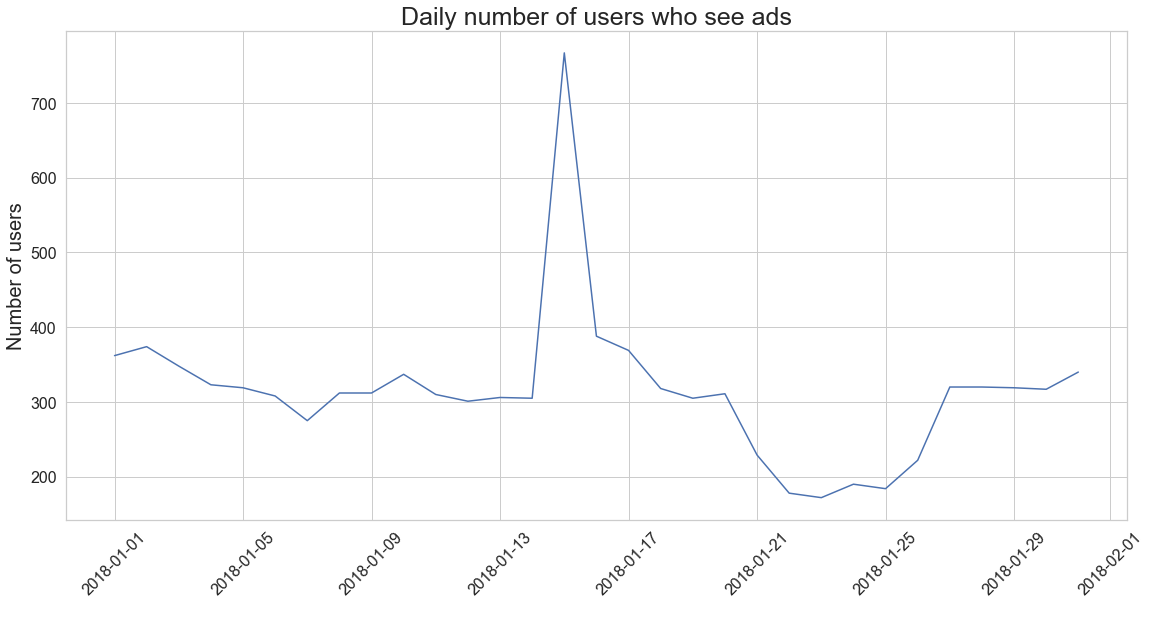

In [11]:
# Set the figure style to "dark"
sns.set(rc = {'figure.figsize': (19, 9)})
sns.set_style("whitegrid")
# Create line plot
g = sns.lineplot(x = "date_served", y = "user_number", data = daily_users_df)
g.set_title("Daily number of users who see ads", fontsize = 25)
# Add x-axis and y-axis labels
g.set(xlabel = " ", ylabel = "Number of users")
#g.set_yticklabels(g.get_yticks(), size = 16)
g.tick_params(labelsize= 16)
g.set_ylabel("Number of users", fontsize = 20)
plt.xticks(rotation = 45)
# Show plot
plt.show()

#  CONVERSION RATE
## DAILY CONVERSION


In [12]:
## Building a conversion function
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate_t = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate_t.fillna(0)
    return conversion_rate

In [13]:
# Group by date_served and count unique users
total = customers_marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and count unique converted users
subscribers = customers_marketing[customers_marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

In [14]:
# Calculate the number of people we marketed to
total = customers_marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = customers_marketing[customers_marketing["converted"] == True]\
                            ['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


One might be wondering, is this a good conversion rate? This will depend heavily on your business. There is no particular number that all marketing teams are trying to reach. Instead, when you're working on a marketing team, it helps to look at historical data to determine whether a conversion rate is what you would expect.

## CONVERSION RATE BY DATE SERVED AND AGE GROUP

In [15]:
customers_marketing

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,2.0
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,2.0
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,2.0
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,2.0


In [16]:
## Building a conversion function
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate_t = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate_t.fillna(0)
    return conversion_rate

# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(customers_marketing, ['date_served', 'age_group'])
# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

In [17]:
age_group_df = age_group_df.reset_index()
age_conv_plt = age_group_df.melt(id_vars = ["date_served"], 
                              value_vars = ["0-18 years", "19-24 years", "24-30 years", "30-36 years", "36-45 years", "45-55 years", "55+ years"])

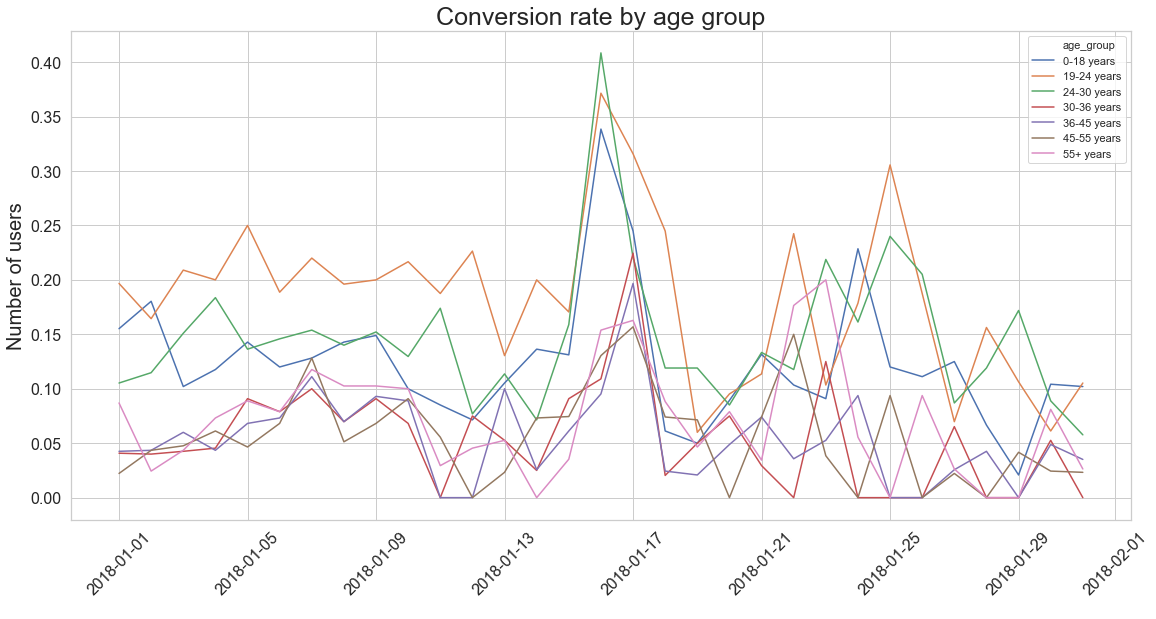

In [18]:

sns.set(rc = {'figure.figsize': (19, 9)})
sns.set_style("whitegrid")

g = sns.lineplot('date_served', 'value', hue = 'age_group', 
                 dashes =[(1, 1), (5, 10)], data = age_conv_plt)
g.axes.set_title("Conversion rate by age group", fontsize = 25)
# Add x-axis and y-axis labels
g.set(xlabel = " ", ylabel = "Conversion rate (%)")
#g.set_yticklabels(g.get_yticks(), size = 16)
g.tick_params(labelsize= 16)
g.set_ylabel("Number of users", fontsize = 20)
plt.xticks(rotation = 45)
# Show plot
plt.show()

# RETENTION RATE
## DAILY RETENTION

In [19]:
# Calculate the number of subscribers
total_subscribers = customers_marketing[customers_marketing["converted"] == True]\
                            ['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = customers_marketing[customers_marketing['is_retained'] == True]\
                   ['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained / total_subscribers
print(round(retention_rate * 100, 2), "%")

66.8 %


In [20]:
# Calculate the number of subscribers
total = customers_marketing.groupby(["date_subscribed"])\
                            ['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = customers_marketing[customers_marketing['is_retained'] == True]\
                   .groupby(['date_subscribed'])['user_id'].nunique()

# Calculate the retention rate
daily_retention_rate = retained/total
daily_retention_rate

date_subscribed
2018-01-01    0.777778
2018-01-02    0.702703
2018-01-03    0.729730
2018-01-04    0.500000
2018-01-05    0.575000
2018-01-06    0.756757
2018-01-07    0.526316
2018-01-08    0.638889
2018-01-09    0.675000
2018-01-10    0.682927
2018-01-11    0.615385
2018-01-12    0.391304
2018-01-13    0.500000
2018-01-14    0.615385
2018-01-15    0.714286
2018-01-16    0.701923
2018-01-17    0.616279
2018-01-18    0.733333
2018-01-19    0.684211
2018-01-20    0.809524
2018-01-21    0.761905
2018-01-22    0.772727
2018-01-23    0.714286
2018-01-24    0.652174
2018-01-25    0.565217
2018-01-26    0.800000
2018-01-27    0.571429
2018-01-28    0.666667
2018-01-29    0.750000
2018-01-30    0.714286
2018-01-31    0.666667
Name: user_id, dtype: float64

In [21]:
daily_retention_plt = daily_retention_rate.reset_index()

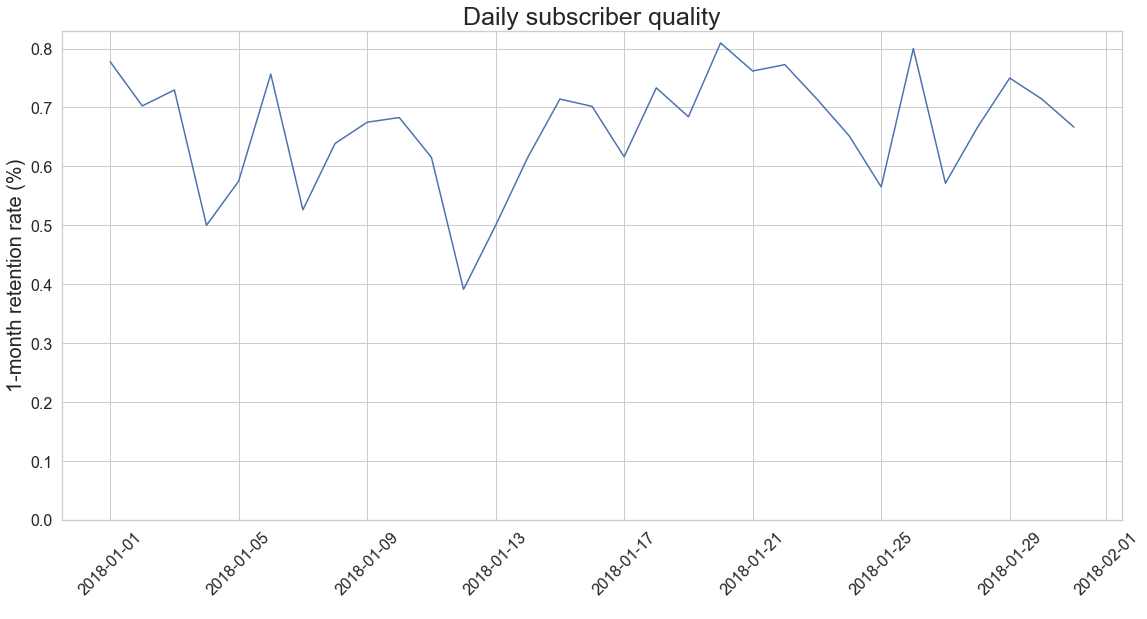

In [22]:
sns.set(rc = {'figure.figsize': (19, 9)})
sns.set_style("whitegrid")

g = sns.lineplot(x = "date_subscribed", y = "user_id", data = daily_retention_plt)

g.axes.set_title("Daily subscriber quality", fontsize = 25)
# Add x-axis and y-axis labels
g.set(xlabel = " ")
#g.set_yticklabels(g.get_yticks(), size = 16)
g.tick_params(labelsize= 16)
g.set_ylabel("1-month retention rate (%)", fontsize = 20)
plt.xticks(rotation = 45)
plt.ylim(0)
# Show plot
plt.show()

## DAILY RETENTION BY CHANNEL

In [23]:
## Building a retention function
def retention_rate(df, column_names):
    # Total number of retained users
    retained = df[df['is_retained'] == True]\
              .groupby(column_names)['user_id'].nunique()
    # Total number of converted users
    converted = df[df['converted'] == True]\
              .groupby(column_names)['user_id'].nunique()   
        
    # Retention rate 
    retention_rate = retained/converted 
    
   # Fill missing values with 0
    retention_rate = retention_rate.fillna(0)
    return retention_rate

In [24]:
daily_retention = retention_rate(customers_marketing, ['date_subscribed', 'subscribing_channel']) 

daily_retention = pd.DataFrame(daily_retention.unstack(level=1)).reset_index()

print(daily_retention.head())

subscribing_channel date_subscribed  Email  Facebook  House Ads  Instagram  \
0                        2018-01-01   1.00  0.875000   0.687500   0.750000   
1                        2018-01-02   0.75  1.000000   0.588235   0.625000   
2                        2018-01-03   0.00  0.800000   0.647059   0.909091   
3                        2018-01-04   1.00  0.666667   0.466667   0.500000   
4                        2018-01-05   1.00  0.571429   0.500000   0.636364   

subscribing_channel      Push  
0                    1.000000  
1                    1.000000  
2                    0.666667  
3                    0.000000  
4                    1.000000  


In [25]:
daily_retention_plt =  daily_retention.melt(id_vars = ["date_subscribed"], 
                              value_vars = ["Email", "Facebook", "House Ads", "Instagram", "Push"])
daily_retention_plt.fillna(0)

,date_subscribed,subscribing_channel,value
0,2018-01-01,Email,1.000000
1,2018-01-02,Email,0.750000
2,2018-01-03,Email,0.000000
3,2018-01-04,Email,1.000000
4,2018-01-05,Email,1.000000
...,...,...,...
150,2018-01-27,Push,0.333333
151,2018-01-28,Push,1.000000
152,2018-01-29,Push,0.500000
153,2018-01-30,Push,0.500000


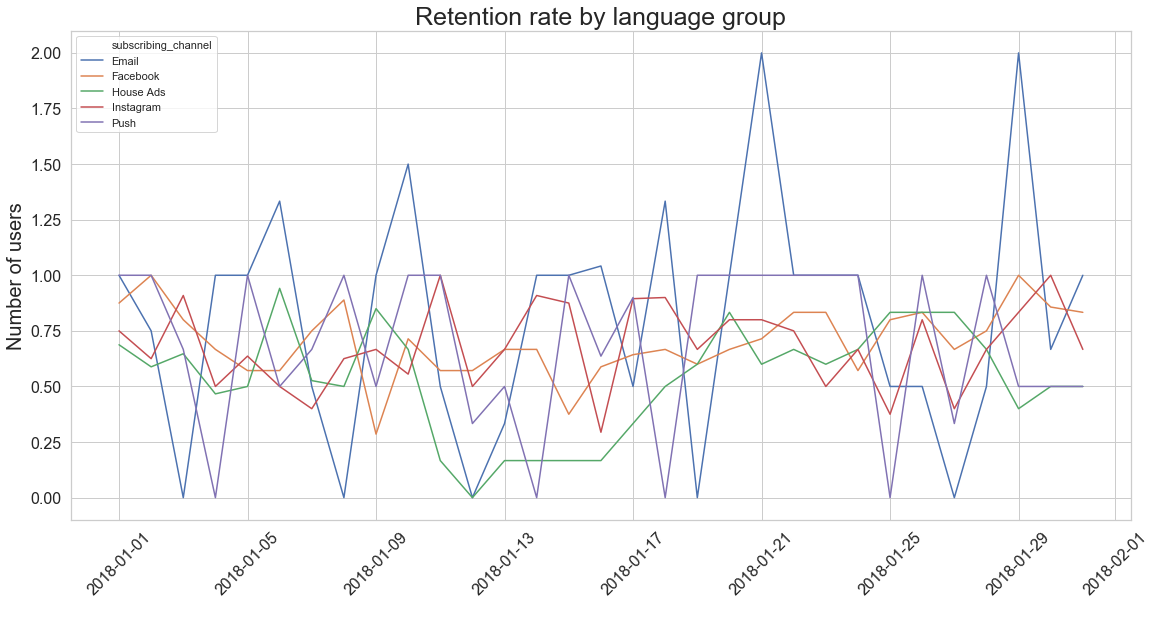

In [26]:
sns.set(rc = {'figure.figsize': (19, 9)})
sns.set_style("whitegrid")

g = sns.lineplot(x = "date_subscribed", y = "value", hue = 'subscribing_channel', 
                 dashes =[(1, 1), (5, 10)], data = daily_retention_plt)

g.axes.set_title("Retention rate by language group", fontsize = 25)
# Add x-axis and y-axis labels
g.set(xlabel = " ", ylabel = "Retention rate (%)")
#g.set_yticklabels(g.get_yticks(), size = 16)
g.tick_params(labelsize= 16)
g.set_ylabel("Number of users", fontsize = 20)
plt.xticks(rotation = 45)
# Show plot
plt.show()

# CUSTOMER SEGMENTATION

In [27]:
# Subset to include only House Ads
house_ads = customers_marketing[customers_marketing['subscribing_channel'] == 'House Ads']
retained = house_ads[house_ads['is_retained'] == True]\
                            ['user_id'].nunique()
subscribers = house_ads[house_ads['converted'] == True]\
                            ['user_id'].nunique()
# Calculate conversion rate
conversion_rate = subscribers/subscribers
print('House ads conversion rate:',  round(conversion_rate*100,2), '%')

House ads conversion rate: 100.0 %


In [28]:
# Subset to include only House Ads
retained = customers_marketing[customers_marketing['is_retained'] == True]\
                            .groupby(['subscribing_channel'])\
                            ['user_id'].nunique()

print(retained)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [29]:
# Group by subscribing_channel and calculate subscribers
subscribers = customers_marketing[customers_marketing['converted'] == True]\
                            .groupby(['subscribing_channel'])\
                            ['user_id'].nunique()

print(subscribers)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


In [30]:
# Calculate the retention rate across the DataFrame
# Calculate conversion rate
channel_retention_rate = retained/subscribers
print('Channel retentions rate:',  round(channel_retention_rate*100,2), '%')

Channel retentions rate: subscribing_channel
Email        87.58
Facebook     68.78
House Ads    58.05
Instagram    68.10
Push         70.13
Name: user_id, dtype: float64 %


### Comparing language conversion rate (I) - English speaker

The marketing team wants to determine how effective the campaign was on converting English speakers.

In [31]:
# Isolate english speakers
english_speakers = customers_marketing[customers_marketing['language_displayed'] == 'English']

# Calculate the total number of english speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of english speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]\
                            ['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:',  round(conversion_rate*100,2), '%')


English speaker conversion rate: 12.92 %


### Comparing language conversion rate (II) - other than english 

Next, you want to look at the conversion rate by the language that the marketing asset was shown in. While many of your users speak English, some prefer another language. Let's check to make sure marketing material translated well across languages.

In [32]:
# Group by language_displayed and count unique users
total = customers_marketing.groupby(['language_displayed'])\
                                  ['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = customers_marketing[customers_marketing['converted'] == True]\
                       .groupby(['language_displayed'])\
                       ['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


# MARKETING CHANNELS

In [33]:
# Group by language_displayed and count unique users
total = customers_marketing.groupby(['age_group'])\
                                  ['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = customers_marketing[customers_marketing['converted'] == True]\
                       .groupby(['age_group'])\
                       ['user_id'].nunique()

# Calculate the conversion rate for all languages
age_conversion_rate = subscribers/total

In [34]:
#type(language_conversion_rate)
age_conversion_rate = age_conversion_rate.reset_index()
age_conversion_rate = age_conversion_rate.rename(columns = {'user_id': 'conversion_rate'})
age_conversion_rate 

,age_group,conversion_rate
0,0-18 years,0.158940
1,19-24 years,0.231829
2,24-30 years,0.186885
3,30-36 years,0.072710
4,36-45 years,0.069943
5,45-55 years,0.070888
6,55+ years,0.077472


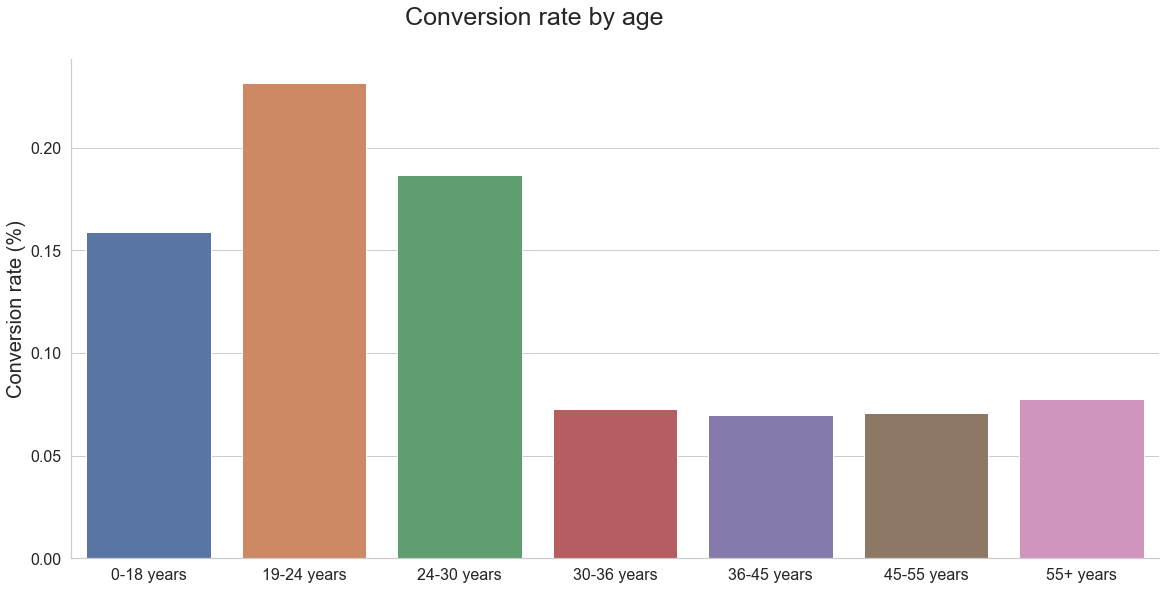

In [35]:
# Turn off the confidence intervals
g = sns.catplot(x = "age_group", y = "conversion_rate", data= age_conversion_rate, kind = "bar")
# Add a title 
g.fig.suptitle("Conversion rate by age", size = 25)
g.fig.subplots_adjust(top = 0.9)

g.set_xlabels(' ', fontsize = 15) # not set_label
g.set_ylabels('Conversion rate (%)', fontsize = 20)
g.set_xticklabels(size = 16)
g.set_yticklabels(size = 16)
g.fig.set_figwidth(19)
g.fig.set_figheight(9)

# Show plot
plt.show()

## CONVERSION RATE BY LANGUAGE

In [36]:
#type(language_conversion_rate)
language_conversion_rate = language_conversion_rate.reset_index()
language_conversion_rate = language_conversion_rate.rename(columns = {'user_id': 'conversion_rate'})
language_conversion_rate 

,language_displayed,conversion_rate
0,Arabic,0.500000
1,English,0.129167
2,German,0.716216
3,Spanish,0.200000


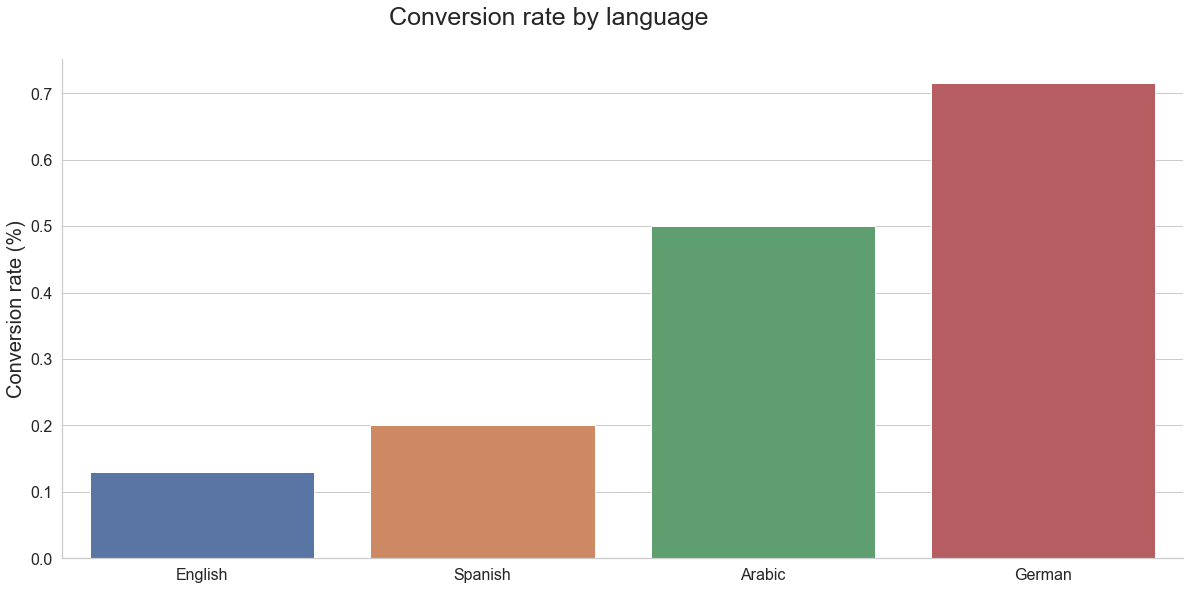

In [37]:
# Turn off the confidence intervals
g = sns.catplot(x = "language_displayed", y = "conversion_rate", data= language_conversion_rate,
            kind = "bar",   
            order = ["English",
                     "Spanish",
                     "Arabic",
                    "German"
                    ])
# Add a title 
g.fig.suptitle("Conversion rate by language", size = 25)
g.fig.subplots_adjust(top = 0.9)

g.set_xlabels(' ', fontsize = 15) # not set_label
g.set_ylabels('Conversion rate (%)', fontsize = 20)
g.set_xticklabels(size = 16)
g.set_yticklabels(size = 16)
g.fig.set_figwidth(19)
g.fig.set_figheight(9)

# Show plot
plt.show()

In [38]:
# Group by date_served and count unique users
total = customers_marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = customers_marketing[customers_marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total

In [39]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_served', 
                                 'conversion_rate']

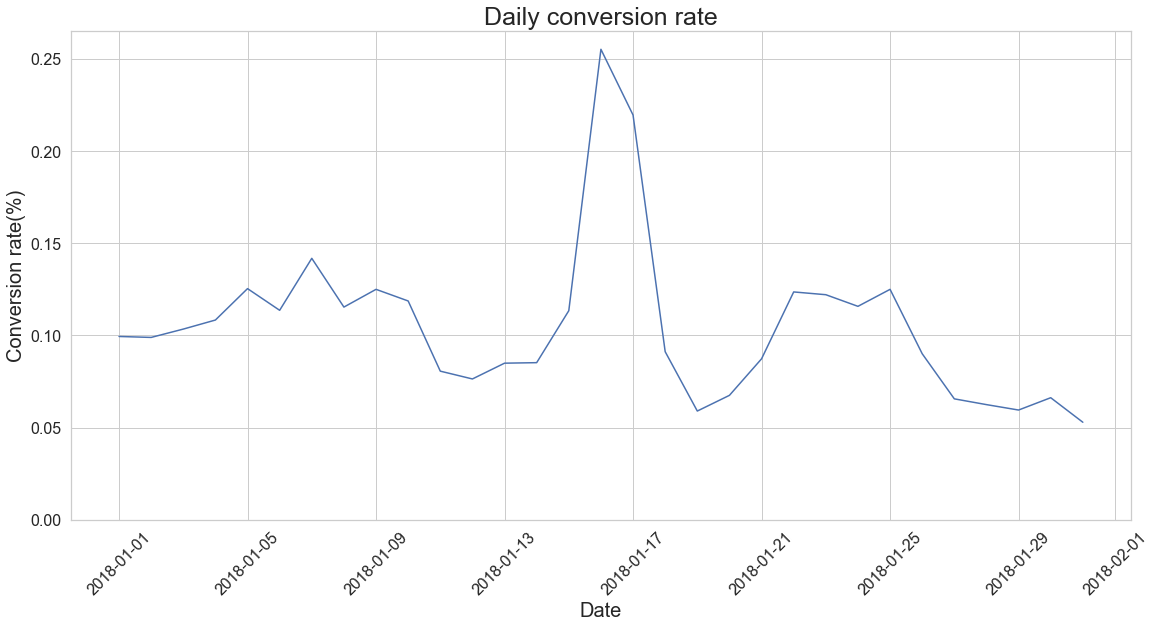

In [40]:
sns.set(rc = {'figure.figsize': (19, 9)})
sns.set_style("whitegrid")

g = sns.lineplot('date_served', 'conversion_rate', data=daily_conversion_rate)
g.set_title("Daily conversion rate", fontsize = 25)
# Add x-axis and y-axis labels
#g.set_xlabel("1-month retention rate (%)", fontsize = 20)
g.tick_params(labelsize= 16)
g.set_xlabel("Date", fontsize = 20)
g.set_ylabel("Conversion rate(%)", fontsize = 20)
plt.xticks(rotation = 45)
plt.ylim(0)
# Show plot
plt.show()

## PREFERRED LANGUAGE OVER TIME

In [41]:
language = customers_marketing.groupby(['date_served',
                              'language_preferred'])\
                              ['user_id'].count()

print(language.head())

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
Name: user_id, dtype: int64


In [42]:
language = pd.DataFrame(language.unstack(level=1)) 
print(language.head())

language_preferred  Arabic  English  German  Spanish
date_served                                         
2018-01-01             4.0    355.0     5.0     11.0
2018-01-02             4.0    397.0     6.0     10.0
2018-01-03             3.0    374.0     3.0      8.0
2018-01-04             2.0    318.0     2.0     14.0
2018-01-05             1.0    314.0     2.0     14.0


In [43]:
language_plt = language.reset_index()
language_plt = language_plt.melt(id_vars = ["date_served"], 
                              value_vars = ["Arabic", "English", "German", "Spanish"])
language_plt

,date_served,language_preferred,value
0,2018-01-01,Arabic,4.0
1,2018-01-02,Arabic,4.0
2,2018-01-03,Arabic,3.0
3,2018-01-04,Arabic,2.0
4,2018-01-05,Arabic,1.0
...,...,...,...
119,2018-01-27,Spanish,14.0
120,2018-01-28,Spanish,22.0
121,2018-01-29,Spanish,18.0
122,2018-01-30,Spanish,19.0


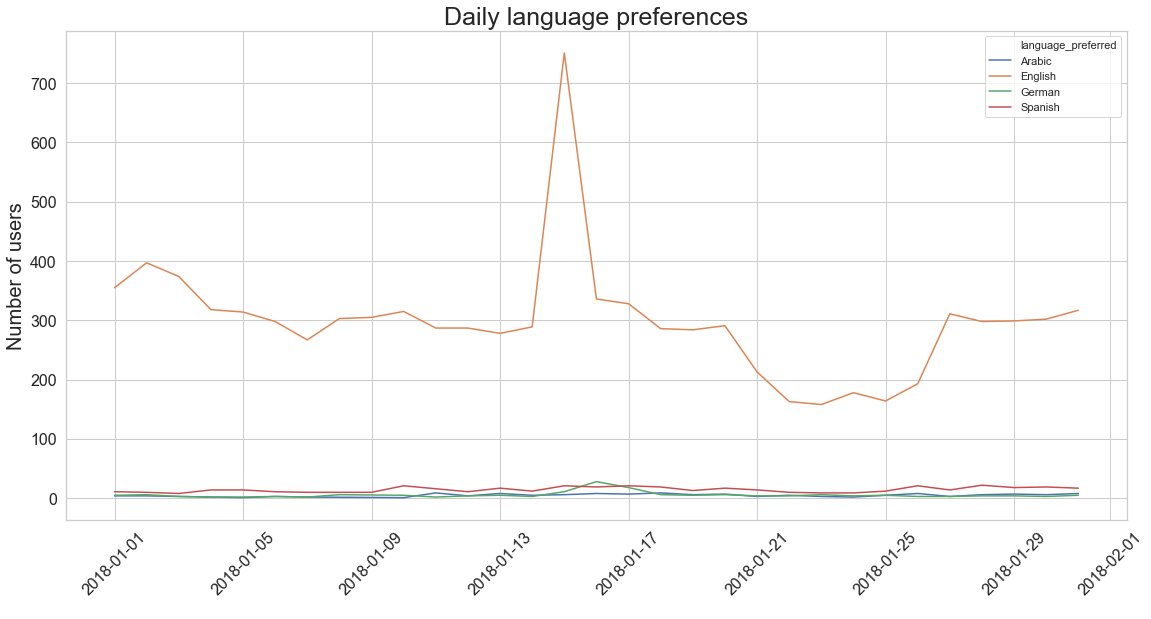

In [44]:
sns.set(rc = {'figure.figsize': (19, 9)})
sns.set_style("whitegrid")

g = sns.lineplot('date_served', 'value', hue='language_preferred',
             #style='Measure', 
             dashes=[(1, 1), (5, 10)], data=language_plt)
g.set_title("Daily language preferences", fontsize = 25)
# Add x-axis and y-axis labels
g.set(xlabel = " ")
g.set_ylabel("Number of users", fontsize = 20)
g.tick_params(labelsize= 16)
plt.xticks(rotation = 45)
# Show plot
plt.show()

# MARKETING CHANNELS ACROSS AGE GROUP

In [45]:
channel_age = customers_marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

In [46]:
channel_age_df = channel_age_df.reset_index()
channel_age_df.rename(columns = {'user_id':'conversion_rate'}, inplace = True)

In [47]:
channel_age_plt = channel_age_df.melt(id_vars = ["marketing_channel"], 
                              value_vars = ["0-18 years", "19-24 years", "24-30 years", "30-36 years", "36-45 years", "45-55 years", "55+ years"])
#channel_age_plt

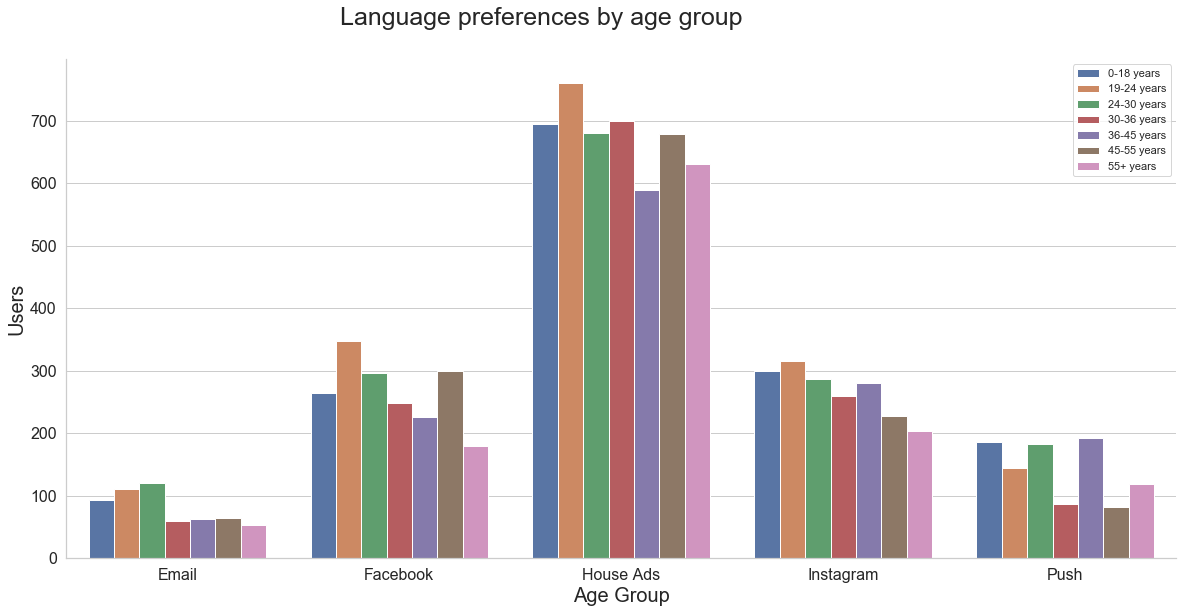

In [48]:
g = sns.catplot(x = "marketing_channel", y = "value", hue = 'age_group', kind = "bar", 
                data = channel_age_plt,legend_out = False)
# Add a title 
g.fig.suptitle("Language preferences by age group", size = 25)
g.fig.subplots_adjust(top = 0.9)

g.set_xlabels('Age Group', fontsize = 20) # not set_label
g.set_ylabels('Users', fontsize = 20)
g.set_xticklabels(size = 16)
g.set_yticklabels(size = 16)
g.fig.set_figwidth(19)
g.fig.set_figheight(9)
plt.legend(loc = 'upper right')
# Show plot
plt.show()

In [49]:
## Building a conversion function
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate_t = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate_t.fillna(0)
    return conversion_rate

# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(customers_marketing, ['date_served', 'age_group'])
# Unstack age_group_conv and create a DataFrame

# Isolate the rows where marketing channel is House Ads
house_ads = customers_marketing[customers_marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served and language displayed
conv_lang_channel = conversion_rate(house_ads, 
                                    ['date_served', 
                                     'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# # Use plotting function to display results
# plotting_conv(conv_lang_df)

In [50]:

age_group_df = age_group_df.reset_index()

age_group_plt = age_group_df.melt(id_vars = ["date_served"], 
                              value_vars = ["0-18 years", "19-24 years", "24-30 years", "30-36 years",
                                            "36-45 years", "45-55 years", "55+ years"])

age_group_plt

,date_served,age_group,value
0,2018-01-01,0-18 years,0.155172
1,2018-01-02,0-18 years,0.180328
2,2018-01-03,0-18 years,0.102041
3,2018-01-04,0-18 years,0.117647
4,2018-01-05,0-18 years,0.142857
...,...,...,...
212,2018-01-27,55+ years,0.026316
213,2018-01-28,55+ years,0.000000
214,2018-01-29,55+ years,0.000000
215,2018-01-30,55+ years,0.081081


## CONVERSION RATE BY DATE SERVED AND AGE GROUP


No handles with labels found to put in legend.


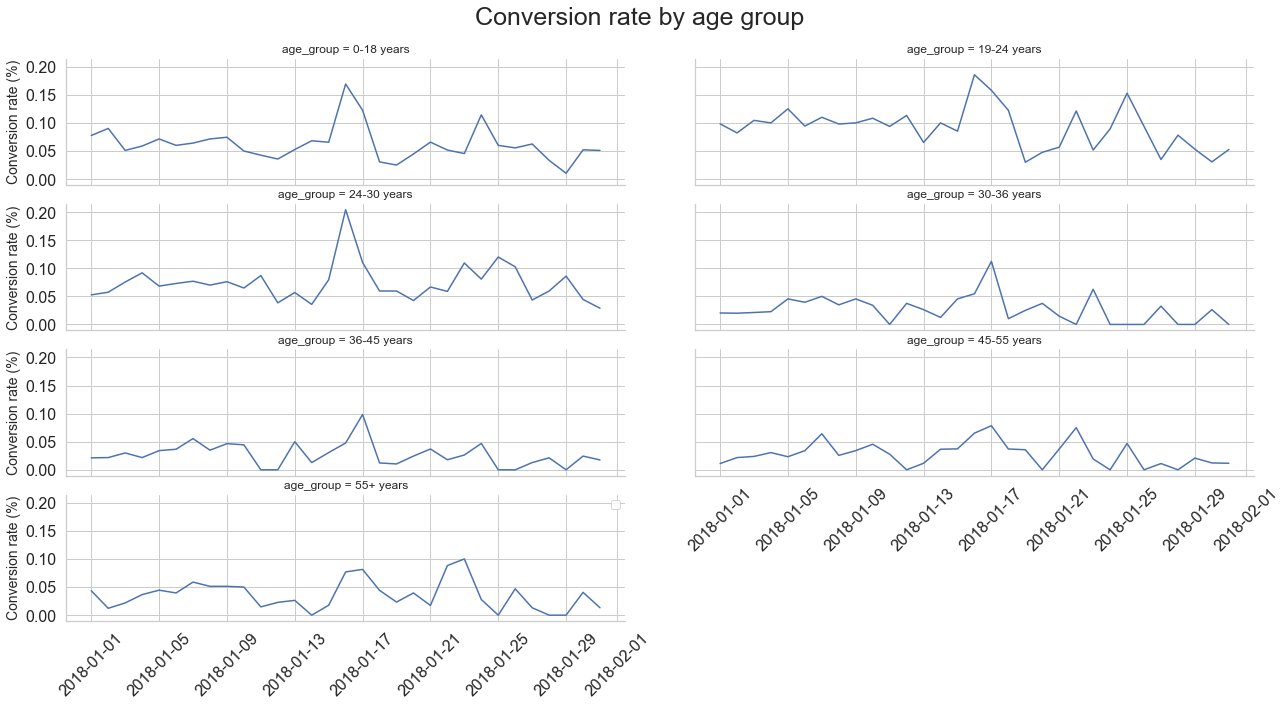

In [51]:
g = sns.relplot(x="date_served", y = "value",
            data = age_group_plt, kind = "line",  col="age_group", 
                legend = False,  markers = True, col_wrap = 2)


g.fig.suptitle("Conversion rate by age group", size = 25)
g.fig.subplots_adjust(top = 0.9)
g.set_xlabels(' ', fontsize = 15) # not set_label
g.set_ylabels('Conversion rate (%)', fontsize = 14)
g.set_xticklabels(size = 16, rotation = 45)
g.set_yticklabels(size = 16)
g.fig.set_figwidth(19)
g.fig.set_figheight(9)
plt.legend(loc='upper right')
# Show plot
plt.show()


# RETENTION RATES

In [52]:
# Count the subs by subscribing channel and date subscribed
retention_total = customers_marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])\
                                       ['user_id'].nunique()

# Print results
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [53]:
# Count the retained subs by subscribing channel and date subscribed
retention_subs = customers_marketing[customers_marketing['is_retained'] == True]\
                           .groupby(['date_subscribed',
                                     'subscribing_channel'])\
                            ['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


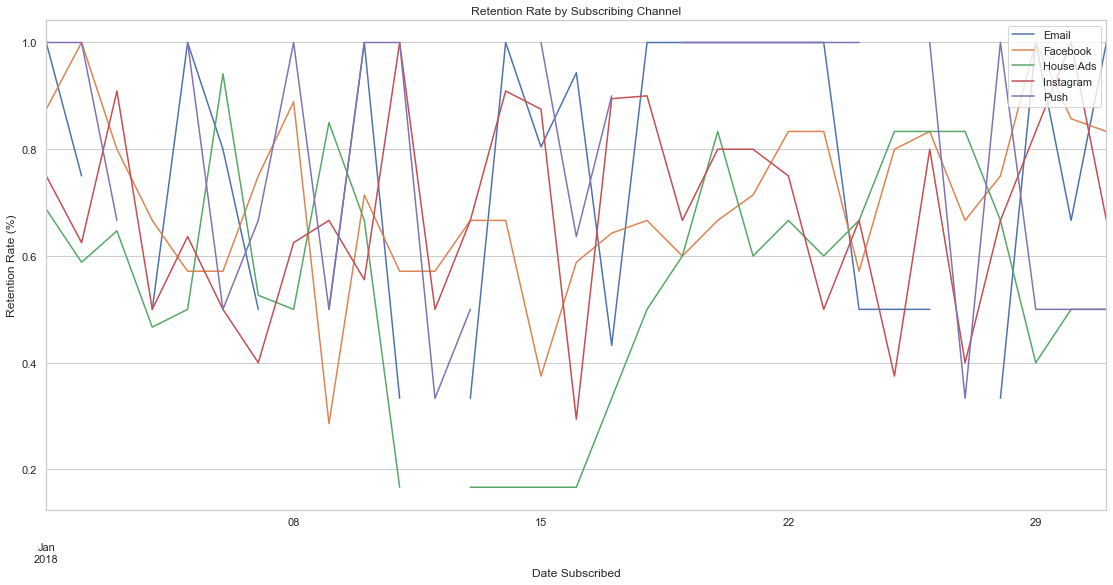

In [54]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', 
           labels = retention_rate_df.columns.values)
plt.show()

In [55]:
retention_plt = retention_rate_df.reset_index()
retention_plt  

subscribing_channel,date_subscribed,Email,Facebook,House Ads,Instagram,Push
0,2018-01-01,1.000000,0.875000,0.687500,0.750000,1.000000
1,2018-01-02,0.750000,1.000000,0.588235,0.625000,1.000000
2,2018-01-03,NaN,0.800000,0.647059,0.909091,0.666667
3,2018-01-04,0.500000,0.666667,0.466667,0.500000,NaN
4,2018-01-05,1.000000,0.571429,0.500000,0.636364,1.000000
5,2018-01-06,0.800000,0.571429,0.941176,0.500000,0.500000
6,2018-01-07,0.500000,0.750000,0.526316,0.400000,0.666667
7,2018-01-08,NaN,0.888889,0.500000,0.625000,1.000000
8,2018-01-09,0.500000,0.285714,0.850000,0.666667,0.500000
9,2018-01-10,1.000000,0.714286,0.666667,0.555556,1.000000


In [56]:
retention_plt  = retention_plt.melt(id_vars = ["date_subscribed"], 
                              value_vars = ["Email", "Facebook", "House Ads", "Instagram", "Push"])

retention_plt.dropna() 

,date_subscribed,subscribing_channel,value
0,2018-01-01,Email,1.000000
1,2018-01-02,Email,0.750000
3,2018-01-04,Email,0.500000
4,2018-01-05,Email,1.000000
5,2018-01-06,Email,0.800000
...,...,...,...
150,2018-01-27,Push,0.333333
151,2018-01-28,Push,1.000000
152,2018-01-29,Push,0.500000
153,2018-01-30,Push,0.500000


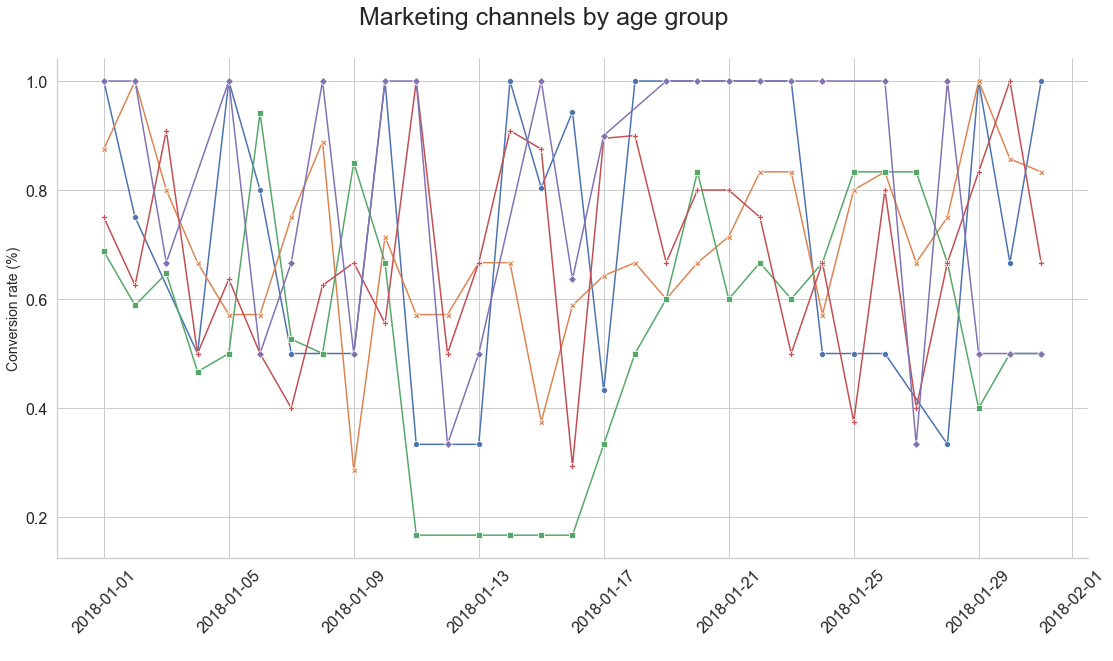

In [57]:
# Add markers and make each line have the same style
g = sns.relplot(x = "date_subscribed", y = "value", 
            data = retention_plt, kind="line", 
            ci = None, style="subscribing_channel", 
            hue ="subscribing_channel", markers=True,
            dashes = False, legend=False)

g.fig.suptitle("Marketing channels by age group", size = 25)
g.fig.subplots_adjust(top = 0.9)
g.set_xlabels(' ', fontsize = 15) # not set_label
g.set_ylabels('Conversion rate (%)', fontsize = 14)
g.set_xticklabels(size = 16, rotation = 45)
g.set_yticklabels(size = 16)
g.fig.set_figwidth(19)
g.fig.set_figheight(9)
#plt.legend(loc = 'lower right')
# Show plot
plt.show()

# “auto”, “brief”, “full”, or False

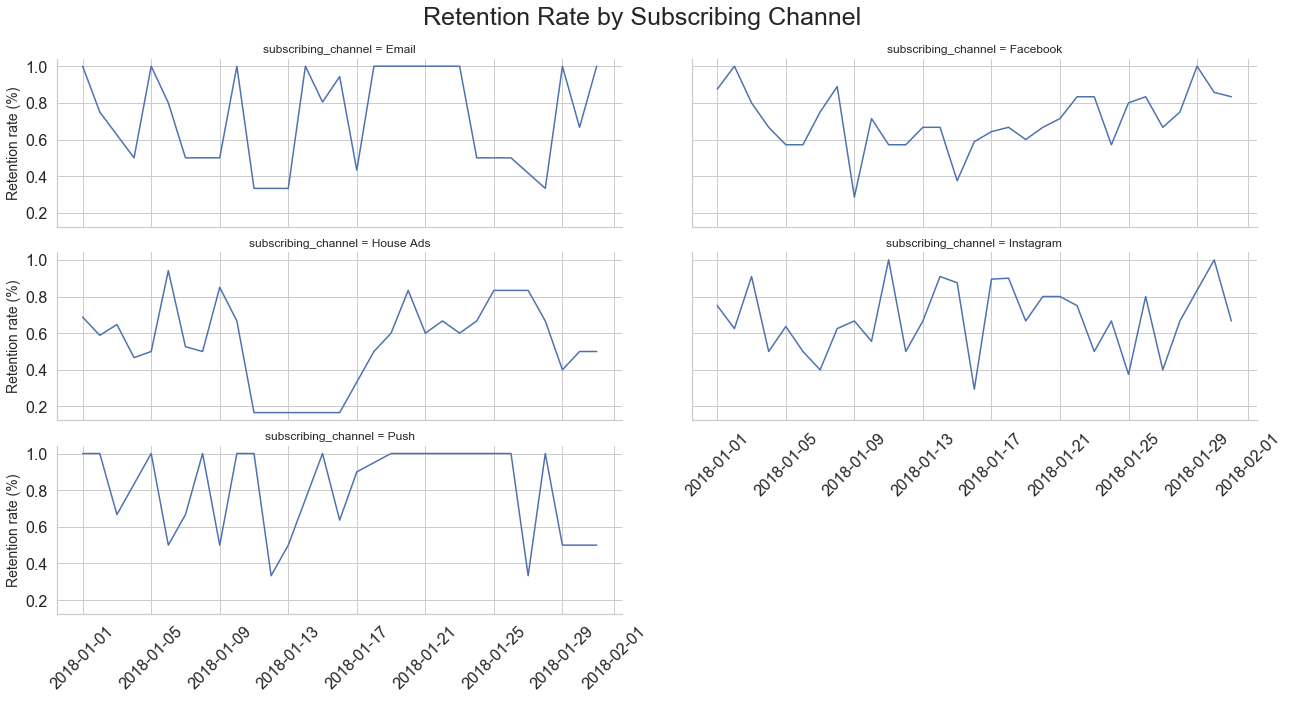

In [58]:
g = sns.relplot(x="date_subscribed", y="value", 
            data= retention_plt, kind="line",  col="subscribing_channel", col_wrap = 2)

g.fig.suptitle("Retention Rate by Subscribing Channel", size = 25)
g.fig.subplots_adjust(top = 0.9)
g.set_xlabels(' ', fontsize = 15) # not set_label
g.set_ylabels('Retention rate (%)', fontsize = 14)
g.set_xticklabels(size = 16, rotation = 45)
g.set_yticklabels(size = 16)
g.fig.set_figwidth(19)
g.fig.set_figheight(9)
#plt.legend(loc = 'lower right')
# Show plot
plt.show()

# RESOLVING INCONSISTENCIES
## DAY OF WEEK TRENDS

In [59]:
## Building a retention function
def retention_rate(df, column_names):
    # Total number of retained users
    retained = df[df['is_retained'] == True]\
              .groupby(column_names)['user_id'].nunique()
    # Total number of converted users
    converted = df[df['converted'] == True]\
              .groupby(column_names)['user_id'].nunique()   
        
    # Retention rate 
    retention_rate = retained/converted 
    
   # Fill missing values with 0
    retention_rate = retention_rate.fillna(0)
    return retention_rate

DoW_retention = retention_rate(customers_marketing, ['DoW'])

In [60]:
DoW_retention_plt = DoW_retention.reset_index()

In [61]:
DoW_retention_plt 

,DoW,user_id
0,0.0,0.763006
1,1.0,0.717593
2,2.0,0.680203
3,3.0,0.612613
4,4.0,0.603960
5,5.0,0.679612
6,6.0,0.634615


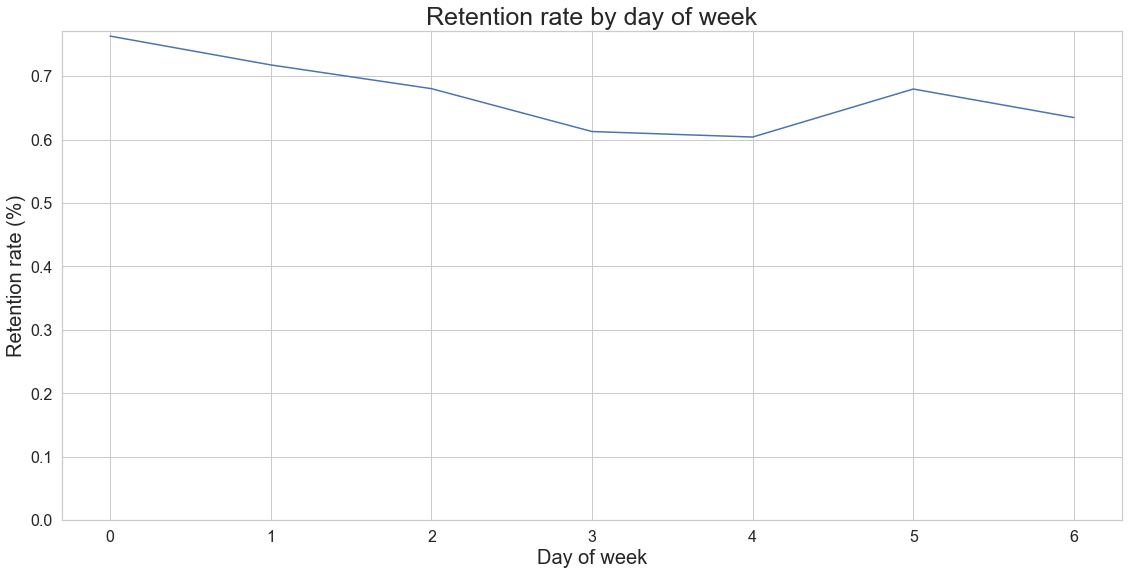

In [62]:
# Create line plot
g = sns.lineplot(x = "DoW", y="user_id", 
                 data= DoW_retention_plt)

g.axes.set_title("Retention rate by day of week", fontsize = 25)
# Add x-axis and y-axis labels
g.set_xlabel("Day of week", fontsize = 20)
#g.set(xlabel = "Day of week", fontsize = 20)
#g.set_yticklabels(g.get_yticks(), size = 16)
g.tick_params(labelsize= 16)
g.set_ylabel("Retention rate (%)", fontsize = 20)
plt.ylim(0)
# Show plot
plt.show()



# HOUSE ADS CONVERSION RATE

The house ads team has become worried about some irregularities they've noticed in conversion rate. It is common for stakeholders to come to you with concerns they've noticed around changing metrics. As a data scientist, it's your job to determine whether these changes are natural fluctuations or if they require further investigation

In [63]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [64]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(customers_marketing, ['date_served', 
                                                 'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


In [65]:
daily_conv_channel = daily_conv_channel.reset_index()
daily_conv_channel = daily_conv_channel.rename(columns = {"user_id": "conversion_rate"})

In [66]:
daily_conv_channel

,date_served,marketing_channel,conversion_rate
0,2018-01-01,Email,1.000000
1,2018-01-01,Facebook,0.117647
2,2018-01-01,House Ads,0.084656
3,2018-01-01,Instagram,0.106667
4,2018-01-01,Push,0.083333
...,...,...,...
150,2018-01-31,Email,1.000000
151,2018-01-31,Facebook,0.078947
152,2018-01-31,House Ads,0.038217
153,2018-01-31,Instagram,0.041096


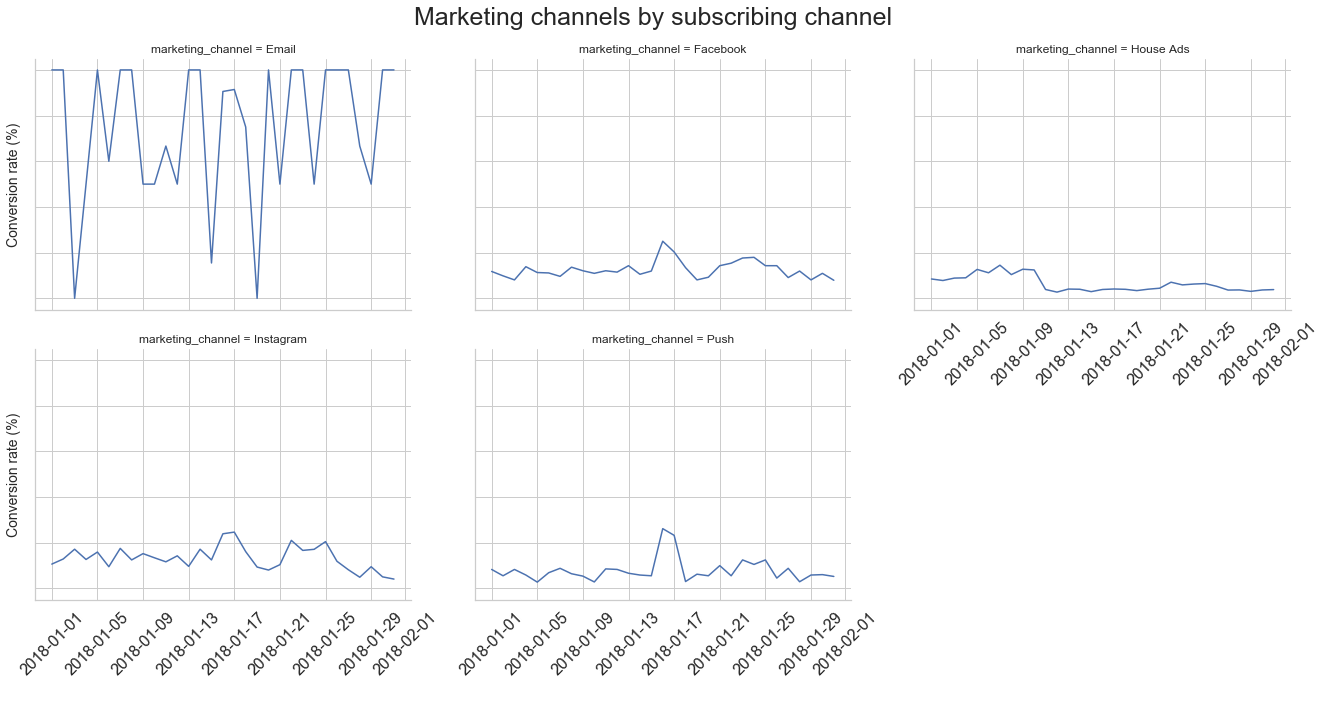

In [67]:
g = sns.relplot(x="date_served", y = "conversion_rate",
            data= daily_conv_channel, kind = "line",  col = "marketing_channel", col_wrap=3)


g.fig.suptitle("Marketing channels by subscribing channel", size = 25)
g.fig.subplots_adjust(top = 0.9)
g.set_xlabels(' ', fontsize = 15) # not set_label
g.set_ylabels('Conversion rate (%)', fontsize = 14)
g.set_xticklabels(size = 16, rotation = 45)
g.set_yticklabels(size = 16)
g.fig.set_figwidth(19)
g.fig.set_figheight(9)
# Show plot
plt.show()

In [68]:
# Add day of week column to marketing
customers_marketing['DoW_served'] = customers_marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(customers_marketing, ['DoW_served', 
                                             'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

In [69]:
DoW_df = DoW_df.reset_index()

In [70]:
DoW_df_plt = DoW_df.melt(id_vars = ["DoW_served"], 
                              value_vars = ["Email", "Facebook", "House Ads", "Instagram", "Push"])
DoW_df_plt

,DoW_served,marketing_channel,value
0,0.0,Email,0.162621
1,1.0,Email,0.906250
2,2.0,Email,0.837209
3,3.0,Email,0.727273
4,4.0,Email,0.666667
5,5.0,Email,0.818182
6,6.0,Email,0.750000
7,0.0,Facebook,0.119601
8,1.0,Facebook,0.147887
9,2.0,Facebook,0.127036


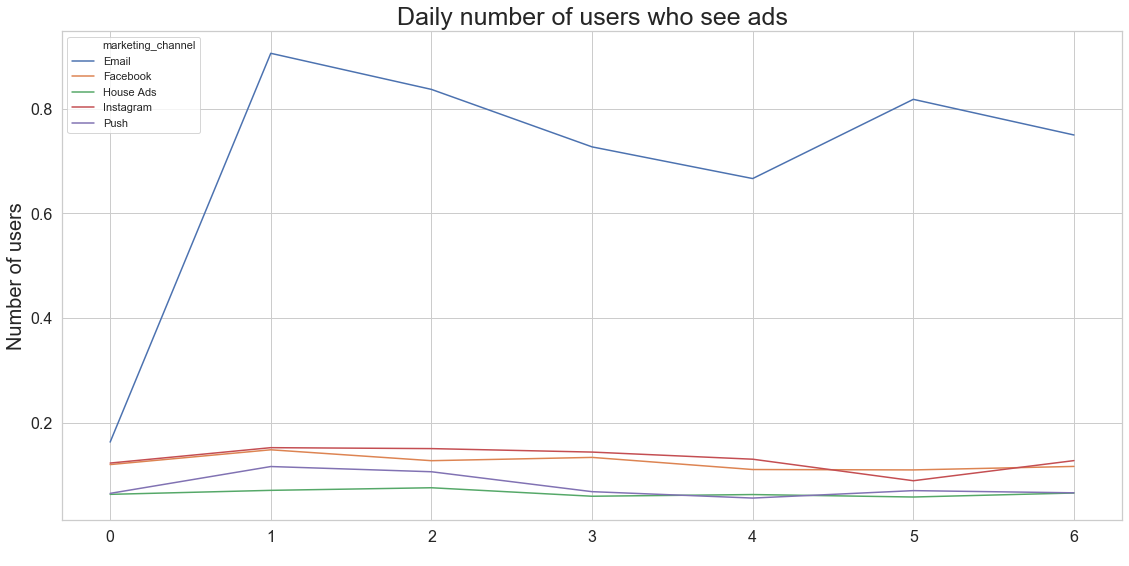

In [71]:
# Create line plot
g = sns.lineplot(x = "DoW_served", y="value", 
                 data= DoW_df_plt,
                 hue="marketing_channel")

g.axes.set_title("Daily number of users who see ads", fontsize = 25)
# Add x-axis and y-axis labels
g.set(xlabel = " ", ylabel = "Number of users")
#g.set_yticklabels(g.get_yticks(), size = 16)
g.tick_params(labelsize= 16)
g.set_ylabel("Number of users", fontsize = 20)
#plt.xticks(rotation = 45)
# Show plot
plt.show()


## HOUSE ADS CONVERSION BY LANGUAGE

Now that you've ruled out natural fluctuations across the day of the week a user saw our marketing assets as they cause for decreasing house ads conversion, you will take a look at conversion by language over time. Perhaps the new marketing campaign does not apply broadly across different cultures.

In [72]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(customers_marketing, ['date_served', 'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


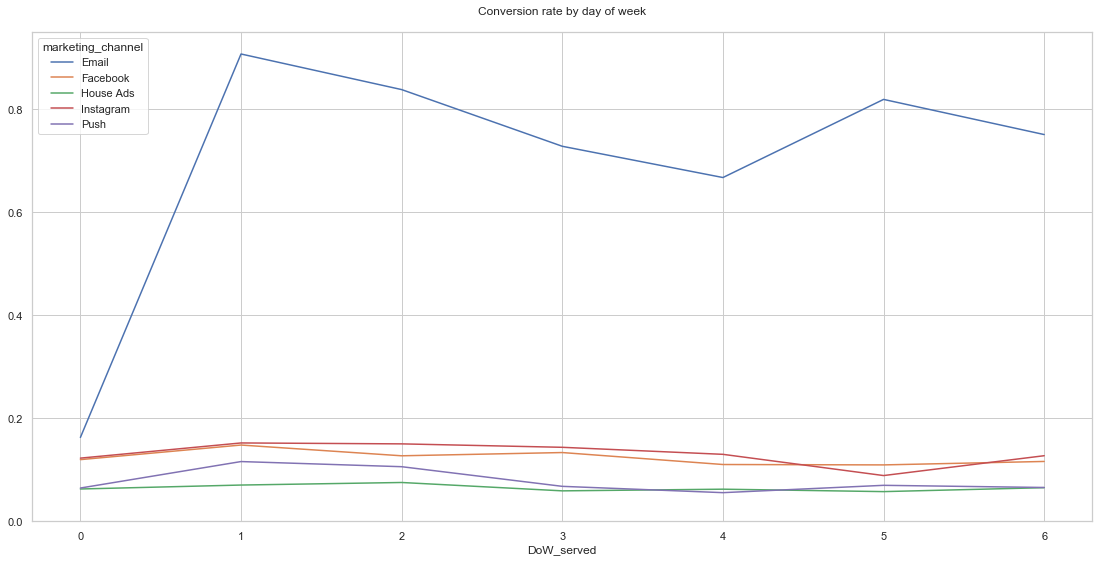

In [73]:
# Add day of week column to marketing
customers_marketing['DoW_served'] = customers_marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(customers_marketing, ['DoW_served', 'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()


In [74]:
DoW_conversion = DoW_conversion.reset_index()

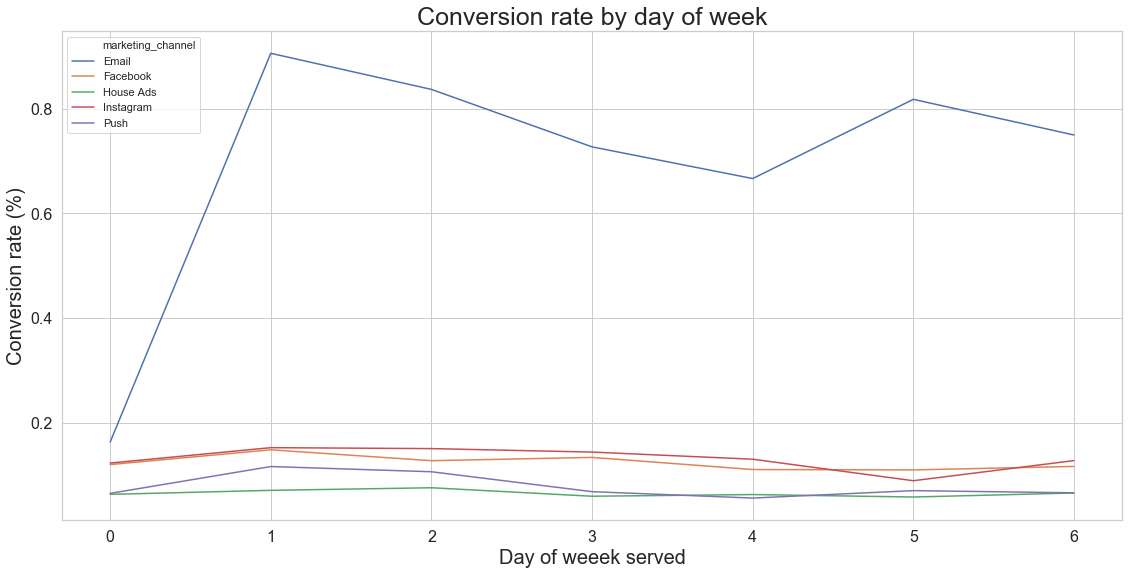

In [75]:
# Create line plot
g = sns.lineplot(x = "DoW_served", y = "user_id", data = DoW_conversion, hue = "marketing_channel")

g.axes.set_title("Conversion rate by day of week", fontsize = 25)
# Add x-axis and y-axis labels
g.set_xlabel("Day of weeek served", fontsize = 20)
g.tick_params(labelsize= 16)
g.set_ylabel("Conversion rate (%)", fontsize = 20)
# Show plot
plt.show()


In [76]:
conv_lang_df = conv_lang_df.fillna(0).reset_index()
conv_lang_df

language_displayed,date_served,Arabic,English,German,Spanish
0,2018-01-01,1.0,0.075145,0.200000,0.000000
1,2018-01-02,0.0,0.068966,0.600000,0.000000
2,2018-01-03,0.0,0.083799,0.333333,0.125000
3,2018-01-04,0.0,0.080537,0.000000,0.214286
4,2018-01-05,0.0,0.118881,0.000000,0.214286
5,2018-01-06,1.0,0.087591,0.000000,0.200000
6,2018-01-07,1.0,0.117647,1.000000,0.125000
7,2018-01-08,0.0,0.079710,0.500000,0.200000
8,2018-01-09,0.0,0.129252,0.000000,0.100000
9,2018-01-10,0.0,0.102041,0.500000,0.222222


In [77]:
conv_lang_plt = conv_lang_df.melt(id_vars = ["date_served"], 
                              value_vars = ["Arabic", "English", "German", "Spanish"])

conv_lang_plt

,date_served,language_displayed,value
0,2018-01-01,Arabic,1.0
1,2018-01-02,Arabic,0.0
2,2018-01-03,Arabic,0.0
3,2018-01-04,Arabic,0.0
4,2018-01-05,Arabic,0.0
...,...,...,...
119,2018-01-27,Spanish,0.0
120,2018-01-28,Spanish,0.0
121,2018-01-29,Spanish,0.0
122,2018-01-30,Spanish,0.0


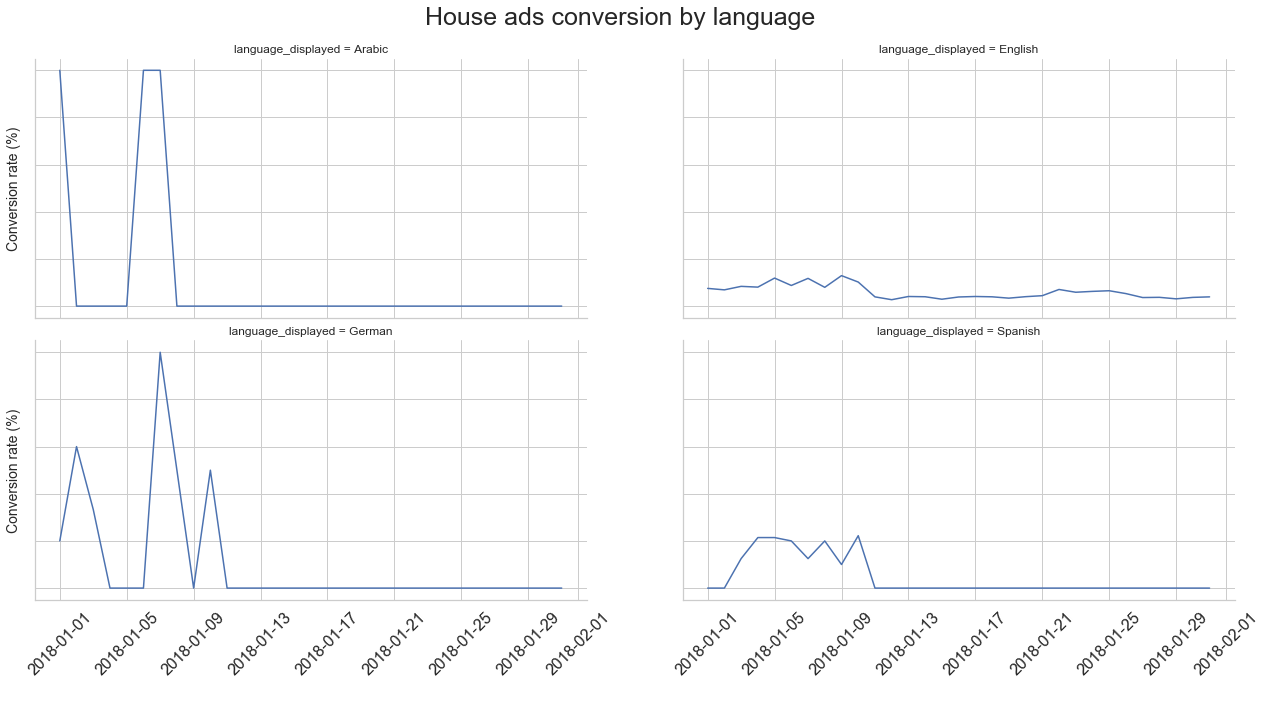

In [78]:
g = sns.relplot(x="date_served", y="value",
            data = conv_lang_plt, kind = "line",  col="language_displayed", 
                legend = False,  markers = True, col_wrap = 2)

g.fig.suptitle("House ads conversion by language", size = 25)
g.fig.subplots_adjust(top = 0.9)
g.set_xlabels(' ', fontsize = 15) # not set_label
g.set_ylabels('Conversion rate (%)', fontsize = 14)
g.set_xticklabels(size = 16, rotation = 45)
g.set_yticklabels(size = 16)
g.fig.set_figwidth(19)
g.fig.set_figheight(9)
# Show plot
plt.show()

##  CONFIRMING HOUSE ADS ERROR

Now that you've created a DataFrame that checks whether users see ads in the correct language let's calculate what percentage of users were not being served ads in the right language and plot your results.

In [79]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_preferred'] == house_ads['language_displayed'], 
    'Yes', 
    'No')

# Group by date_served and is_correct_lang
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Interesting. As you can see, the English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period. You will investigate further.

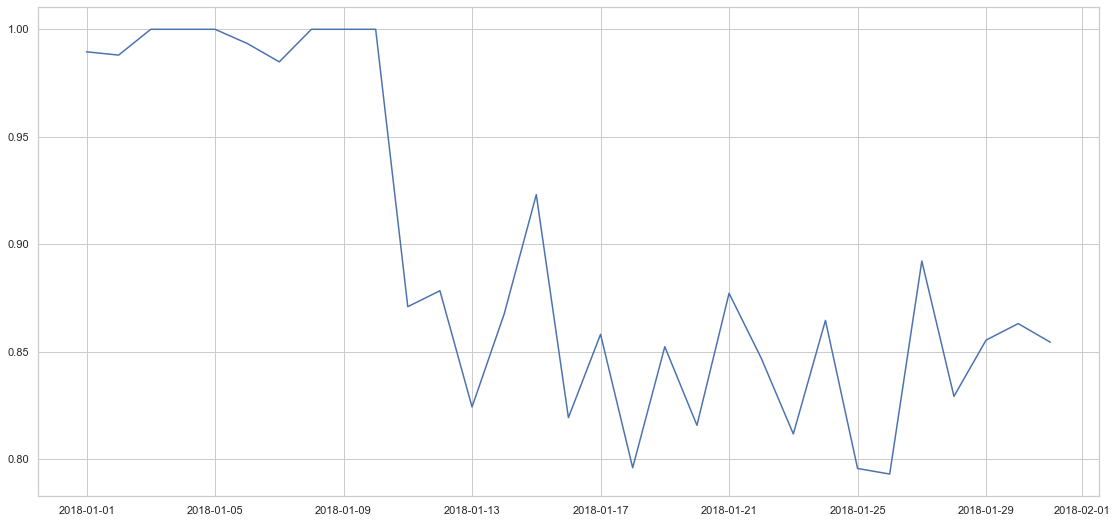

In [80]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()

In [81]:
language_check_df = language_check_df.reset_index()

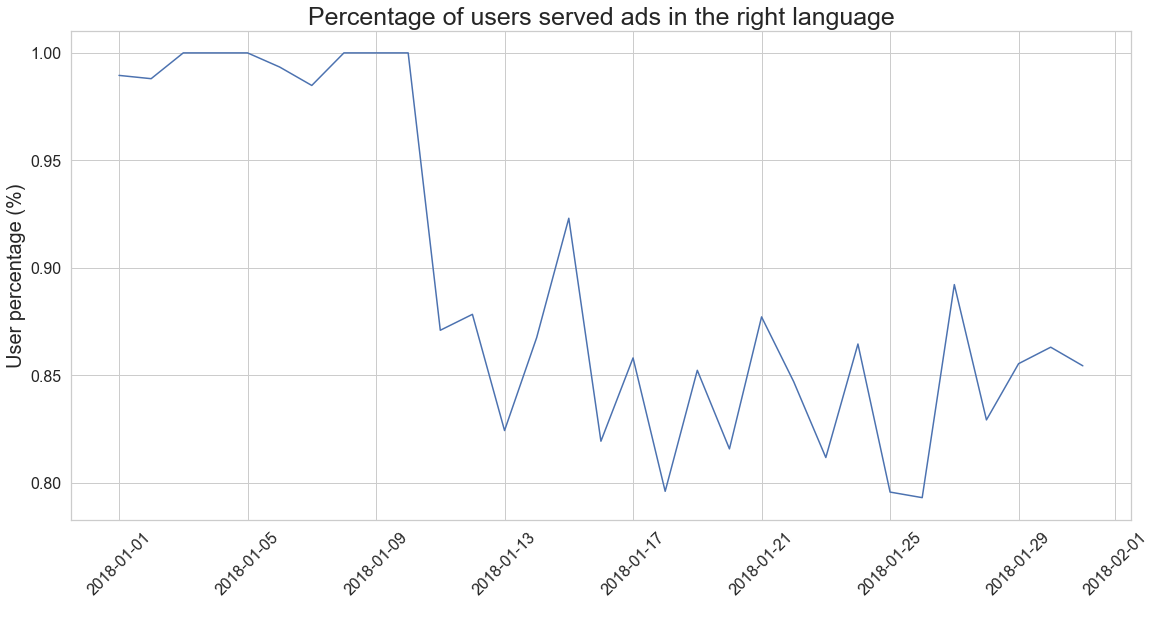

In [82]:
sns.set(rc = {'figure.figsize': (19, 9)})
sns.set_style("whitegrid")

g = sns.lineplot('date_served', 'pct', data = language_check_df)

g.axes.set_title("Percentage of users served ads in the right language", fontsize = 25)
# Add x-axis and y-axis labels
g.set(xlabel = " ", ylabel = "Number of users")
g.tick_params(labelsize= 16)
g.set_ylabel("User percentage (%)", fontsize = 20)
plt.xticks(rotation = 45)
# Show plot
plt.show()

## CONVERSION INDEXES


Now that you've determined that language is, in fact, the issue with House Ads conversion, stakeholders need to know how many subscribers they lost as a result of this bug.

In [83]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed']) 

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


##  ANALYZING USER PREFERENCES

To understand the true impact of the bug, it is crucial to determine how many subscribers we would have expected had there been no language error. This is crucial to understanding the scale of the problem and how important it is to prevent this kind of error in the future.

In [84]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 
                          'language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

In [85]:
# Create English conversion rate column for affected period
converted_df['english_conv_rate'] = converted_df.loc['2018-01-11':'2018-01-31'][('converted','English')]

# Create expected conversion rates for each language
converted_df['expected_spanish_rate'] = converted_df['english_conv_rate']*spanish_index
converted_df['expected_arabic_rate'] = converted_df['english_conv_rate']*arabic_index
converted_df['expected_german_rate'] = converted_df['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted_df['expected_spanish_conv'] = converted_df['expected_spanish_rate']/100*converted_df[('user_id','Spanish')]
converted_df['expected_arabic_conv'] = converted_df['expected_arabic_rate']/100*converted_df[('user_id','Arabic')]
converted_df['expected_german_conv'] = converted_df['expected_german_rate']/100*converted_df[('user_id','German')]

##  ASSESSING BUG IMPACT

It's time to calculate how many subscribers were lost due to mistakenly serving users English rather than their preferred language. Once the team has an estimate of the impact of this error, they can determine whether it's worth putting additional checks in place to avoid this in the future—you might be thinking, of course, it's worth it to try to prevent errors! In a way, you're right, but every choice a company makes requires work and funding. The more information your team has, the better they will be able to evaluate this trade-off.

In [86]:
# Use .loc to slice only the relevant dates
converted = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted[('converted','Spanish')].sum() + converted[('converted','Arabic')].sum() + converted[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

32.144143192488265
